In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({
    "figure.facecolor":(0, 1, 0, .2),
    "axes.facecolor":(0, 0, 0, 1),
})
data_set=pd.read_csv("A:/Machine Learning/my_data.csv")
data_set

,User_ID,Gender,Age,Salary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [3]:
x=data_set.iloc[:,[2, 3]].values
y=data_set.iloc[:,4].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=.25, random_state=0)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [4]:
data_set

,User_ID,Gender,Age,Salary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [6]:
# Fitting ie. Training Decision Tree Classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
randomForestClassifier=RandomForestClassifier(n_estimators=10, criterion='entropy')
randomForestClassifier.fit(X_train, y_train)
# n_estimators is the required no of trees in the Random Forest. Default is 10 We can take any to take care of the overfitting 
# issue 
# criterion a function to analyze the accuracy of the split, here entropy is taken for the information gain

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [7]:
y_pred=randomForestClassifier.predict(X_test)

In [8]:
# For determining the correct and incoreect predictions, Creating the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)

In [9]:
cm

array([[4, 0],
       [1, 1]], dtype=int64)

C:\Users\farha\AppData\Local\Temp\ipykernel_4172\1344829895.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set==j,0], x_set[y_set==j, 1], c=ListedColormap(('purple', 'green'))(i),label=j)


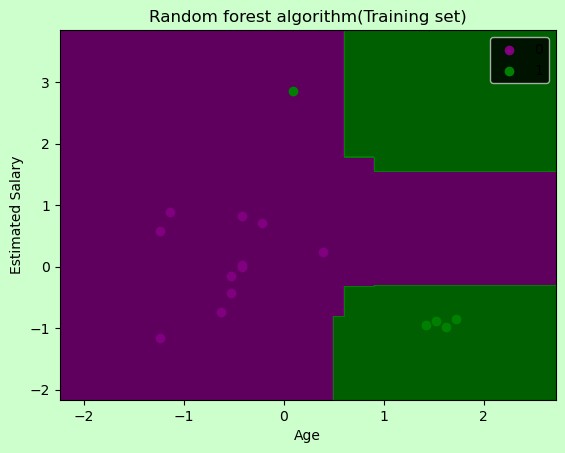

In [14]:
from matplotlib.colors import ListedColormap
x_set, y_set=X_train, y_train
x1, x2=np.meshgrid(
    np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max()+1, step=.01), 
    np.arange(start=x_set[:,1].min()-1, stop=x_set[:,1].max()+1, step=.01))
plt.contourf(x1, x2, randomForestClassifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha=.75, cmap=ListedColormap(('purple','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0], x_set[y_set==j, 1], c=ListedColormap(('purple', 'green'))(i),label=j)
plt.title("Random forest algorithm(Training set)")
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

C:\Users\farha\AppData\Local\Temp\ipykernel_4172\2392642390.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set==j,0], x_set[y_set==j, 1], c=ListedColormap(('purple', 'green'))(i),label=j)


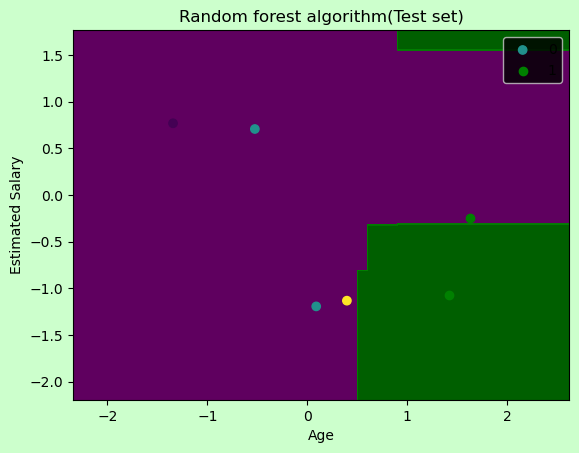

In [16]:
from matplotlib.colors import ListedColormap
x_set, y_set=X_test, y_test
x1, x2=np.meshgrid(
    np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max()+1, step=.01), 
    np.arange(start=x_set[:,1].min()-1, stop=x_set[:,1].max()+1, step=.01))
plt.contourf(x1, x2, randomForestClassifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha=.75, cmap=ListedColormap(('purple','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0], x_set[y_set==j, 1], c=ListedColormap(('purple', 'green'))(i),label=j)
plt.title("Random forest algorithm(Test set)")
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
|